### Read in photometry results from csv files and match the stars to measure the asteroid lightcurve

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from astropy.io import fits
import pandas as pd
%matplotlib inline

In [2]:
csvfiles = np.sort(glob('*.csv'))
df0 = pd.read_csv(csvfiles[0])
sources = df0[df0.columns[0]].values
columns = ['tobs'] + list(sources)

In [3]:
sources

array(['asteroid1', 'asteroid2', 'star1', 'star2', 'star3', 'star4',
       'star5', 'star6', 'star7', 'star8'], dtype=object)

In [4]:
df0

,#20131004_0045_phot.csv,ra,dec,r,Npix,Counts,CorrCounts,bkgd,noise
0,asteroid1,16.813842,9.389269,28.7,709,246607.0,20071.7,319.5,23.5
1,asteroid2,16.748958,9.158769,28.7,709,241297.6,21008.7,310.7,22.1
2,star1,16.719200,9.237303,28.7,709,287831.3,67092.5,311.3,22.8
3,star2,16.702862,9.296458,28.7,709,276705.2,53710.8,314.5,22.6
4,star3,16.619842,9.252669,28.7,709,342236.3,119638.3,314.0,22.3
5,star4,16.813854,9.260964,28.7,709,273977.5,52324.5,312.6,23.9
6,star5,16.708313,9.173739,28.7,709,293363.0,74476.6,308.7,21.9
7,star6,16.765696,9.385497,28.7,709,298025.6,75559.1,313.8,21.8
8,star7,16.599783,9.305411,28.7,709,264045.0,41646.2,313.7,23.2
9,star8,16.596679,9.157789,28.7,709,303199.0,81963.9,312.0,22.8


In [5]:
fitspath = '../'
df_all = pd.DataFrame(columns=columns)
for i, f in enumerate(csvfiles):
    fitsfile = fitspath+f[:-9]+'.fits'
    hdu = fits.open(fitsfile)
    hd = hdu[0].header
    df_all.loc[i, 'tobs'] = hd['MJD-OBS']

    df1 = pd.read_csv(f)
    for s in sources:
        df_all.loc[i, s] = df1[df1[df1.columns[0]]==s]['CorrCounts'].values.astype('float')[0]
    

In [6]:
df_all

,tobs,asteroid1,asteroid2,star1,star2,star3,star4,star5,star6,star7,star8
0,56569.47963,20071.7,21008.7,67092.5,53710.8,119638.3,52324.5,74476.6,75559.1,41646.2,81963.9
1,56569.480958,18496.6,19999.1,67579.2,54628.1,121313.8,54196.1,73566.6,72723.6,41935.3,83481.6
2,56569.482279,17526.9,20566.3,66248.0,56386.3,121342.5,53603.3,75904.0,75176.9,41795.2,84270.1
3,56569.483603,20071.1,22570.5,68990.8,56977.4,121650.9,53467.2,73177.9,77180.8,40999.9,85448.8
4,56569.484925,18879.3,20574.0,67800.4,57253.3,123008.8,55365.2,73330.1,76842.6,41556.7,84695.8
...,...,...,...,...,...,...,...,...,...,...,...
140,56569.673391,20642.9,23347.5,71052.7,59495.5,126578.9,56728.3,77557.6,79605.1,43032.9,89695.9
141,56569.674713,20943.9,21815.1,69850.8,59214.5,129330.8,57115.1,78383.9,80200.8,44389.8,89362.0
142,56569.676033,18461.1,19475.7,70322.6,60438.5,129056.6,57579.8,78506.2,79899.9,43359.7,90514.6
143,56569.677356,18545.6,23852.2,70821.0,60309.5,128164.3,57090.4,76463.9,80057.8,43022.1,90097.7


In [7]:
#df_all = df_all.drop(26)

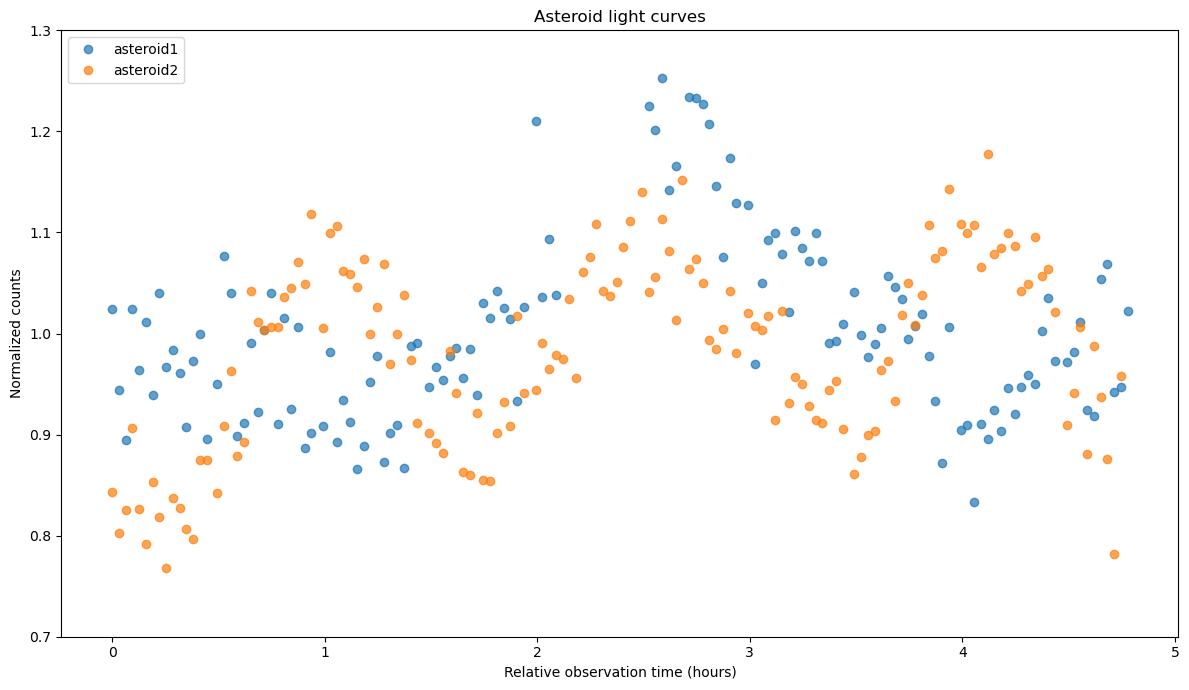

In [8]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

sources_select = [s for s in sources if s[0:4]=='star']
sources_select = [s for s in sources if s[0:8]=='asteroid']
#sources_select = sources

t0 = np.median(df_all['tobs'])
t0 = df_all.iloc[0]['tobs']
for s in sources_select:
    x = 24*(df_all['tobs']-t0)
    y = df_all[s] / np.median(df_all[s])
    plt.plot(x, y, 'o', alpha=0.7, label=s)
    #plt.plot(x, y, ':', alpha=0.5)
ax.legend()
ax.set_xlabel('Relative observation time (hours)')
ax.set_ylabel('Normalized counts')
ax.set_title('Asteroid light curves')

ax.set_ylim(0.7,1.3)
fig.tight_layout()
fig.savefig('asteroid.png')

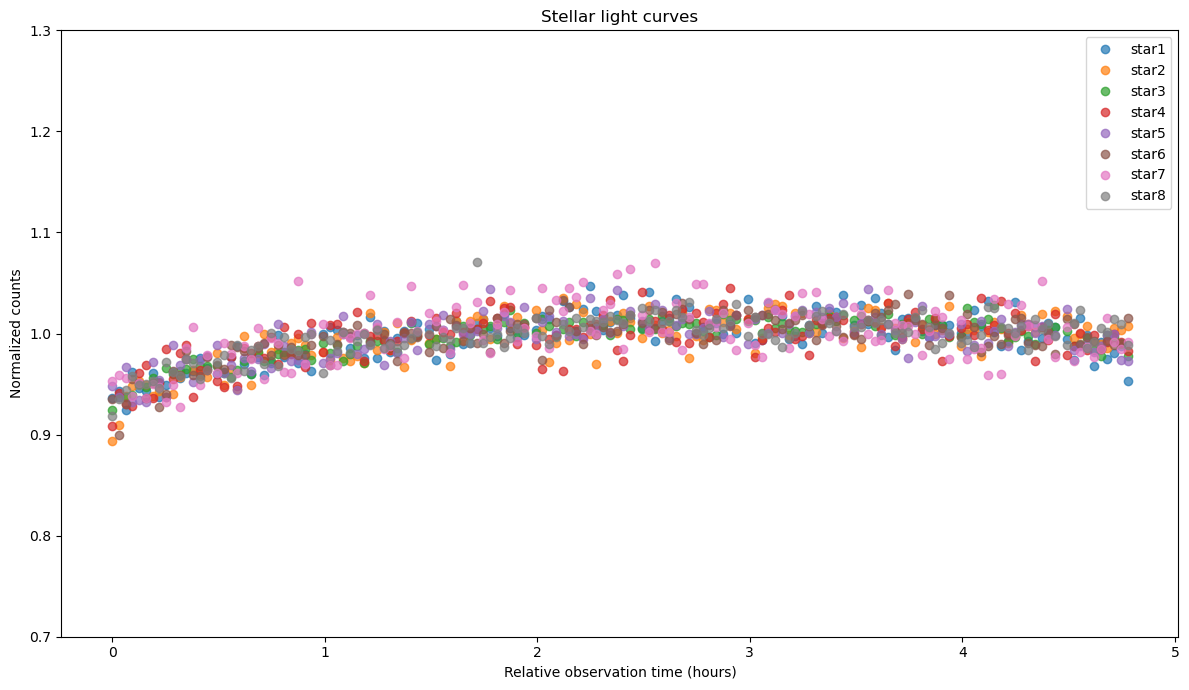

In [9]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)

sources_select = [s for s in sources if s[0:4]=='star']
#sources_select = [s for s in sources if s[0:8]=='asteroid']
#sources_select = sources

t0 = np.median(df_all['tobs'])
t0 = df_all.iloc[0]['tobs']
for s in sources_select:
    x = 24*(df_all['tobs']-t0)
    y = df_all[s] / np.median(df_all[s])
    plt.plot(x, y, 'o', alpha=0.7, label=s)
    #plt.plot(x, y, ':', alpha=0.5)
ax.legend()
ax.set_xlabel('Relative observation time (hours)')
ax.set_ylabel('Normalized counts')
ax.set_title('Stellar light curves')

ax.set_ylim(0.7,1.3)
fig.tight_layout()
fig.savefig('stars.png')